### Імпорт бібліотек

In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots

## Завдання 1

### Підготовка даних

In [2]:
data1 = {
    "Y": [468, 496, 484, 528, 495, 543, 509, 565, 502, 568, 511, 575, 536, 557, 534],
    "X": [1200, 1300, 1400, 1450, 1500, 1550, 1600, 1650, 1630, 1680, 1710, 1780, 1810, 1830, 1850],
    "Z": [600, 650, 630, 620, 610, 590, 580, 560, 570, 540, 520, 510, 500, 490, 430],
}

df1 = pd.DataFrame(data1)
df1["X2"] = df1["X"] ** 2
df1["Z2"] = df1["Z"] ** 2

X = df1[["X", "X2", "Z", "Z2"]]
X = sm.add_constant(X)
y = df1["Y"]

### Модель регресії

In [3]:
model = sm.OLS(y, X).fit()

print("\nОцінені коефіцієнти регресії:")
print(model.params)

formula = (
    f"y = {model.params['const']:.4f} + {model.params['X']:.6f}*x + "
    f"{model.params['X2']:.9f}*x2 + {model.params['Z']:.6f}*z + {model.params['Z2']:.9f}*z2"
)
print("\nРівняння множинної регресії:")
print(formula)


Оцінені коефіцієнти регресії:
const    16.295497
X        -0.203223
X2        0.000128
Z         1.557838
Z2       -0.001171
dtype: float64

Рівняння множинної регресії:
y = 16.2955 + -0.203223*x + 0.000128361*x2 + 1.557838*z + -0.001170671*z2


### Довірчі інтервали

In [18]:
print("Прогноз та 99% довірчий інтервал для кожного вектора ознак:")
predictions = model.get_prediction(X)
ci = predictions.conf_int(alpha=0.01)
mean_pred = predictions.predicted_mean

for i in range(len(df1)):
    x_i, z_i = df1.iloc[i]["X"], df1.iloc[i]["Z"]
    print(f"x={x_i}, z={z_i} => ={mean_pred[i]:.2f}, інтервал: ({ci[i, 0]:.2f}, {ci[i, 1]:.2f})")

Прогноз та 99% довірчий інтервал для кожного вектора ознак:
x=1200, z=600 => =470.53, інтервал: (390.68, 550.38)
x=1300, z=650 => =487.02, інтервал: (424.83, 549.22)
x=1400, z=630 => =500.17, інтервал: (461.83, 538.51)
x=1450, z=620 => =507.36, інтервал: (472.94, 541.78)
x=1500, z=610 => =514.95, інтервал: (482.50, 547.40)
x=1550, z=590 => =521.30, інтервал: (488.96, 553.64)
x=1600, z=580 => =529.48, інтервал: (499.77, 559.19)
x=1650, z=560 => =535.71, інтервал: (505.72, 565.69)
x=1630, z=570 => =533.70, інтервал: (504.25, 563.15)
x=1680, z=540 => =537.03, інтервал: (503.64, 570.43)
x=1710, z=520 => =537.65, інтервал: (500.18, 575.13)
x=1780, z=510 => =551.26, інтервал: (514.09, 588.44)
x=1810, z=500 => =555.24, інтервал: (508.21, 602.26)
x=1830, z=490 => =556.53, інтервал: (504.42, 608.64)
x=1850, z=430 => =533.06, інтервал: (453.59, 612.54)


### Коефіціент множинної кореляції

In [21]:
r_squared = model.rsquared
R = np.sqrt(r_squared)
print(f"Коефіцієнт множинної кореляції R = {R}")
print(f"Коефіцієнт детермінації R2 = {r_squared}")

Коефіцієнт множинної кореляції R = 0.7544928785670213
Коефіцієнт детермінації R2 = 0.5692595038083499


### Візуалізація

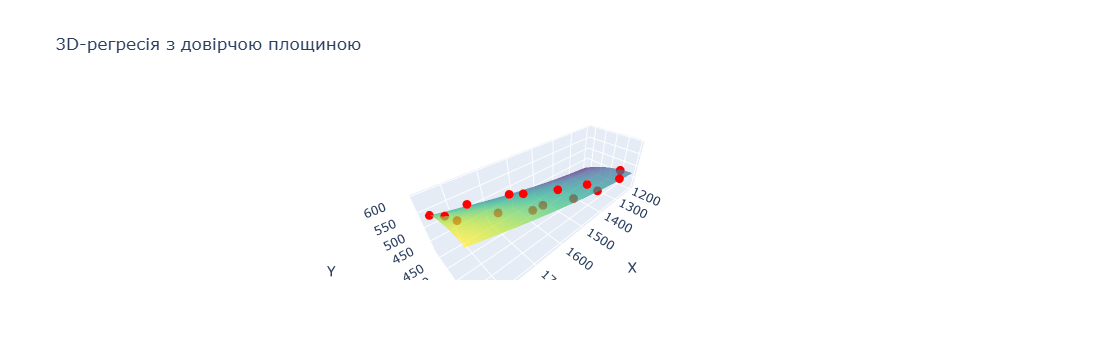

In [25]:
x_surf, z_surf = np.meshgrid(
    np.linspace(df1["X"].min(), df1["X"].max(), 20),
    np.linspace(df1["Z"].min(), df1["Z"].max(), 20)
)
x2_surf = x_surf ** 2
z2_surf = z_surf ** 2

X_grid = pd.DataFrame({
    "const": 1,
    "X": x_surf.ravel(),
    "X2": x2_surf.ravel(),
    "Z": z_surf.ravel(),
    "Z2": z2_surf.ravel()
})

y_pred_grid = model.predict(X_grid).values.reshape(x_surf.shape)

surface = go.Surface(
    x=x_surf, y=z_surf, z=y_pred_grid,
    colorscale='Viridis', opacity=0.7,
    name="Площина регресії", showscale=False
)

scatter = go.Scatter3d(
    x=df1["X"], y=df1["Z"], z=df1["Y"],
    mode='markers',
    marker=dict(size=5, color='red'),
    name="Дані"
)

fig = go.Figure(data=[surface, scatter])
fig.update_layout(
    title="3D-регресія з довірчою площиною",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Z",
        zaxis_title="Y"
    ),
    legend=dict(x=0.8, y=0.9)
)

## Завдання 2

### Підготовка даних

In [14]:
data2 = {
    "Y": [11.06, 10.36, 10.04, 12.28, 11.44, 10.06, 10.56, 11.24, 10.62, 10.82,
          10.90, 9.16, 11.46, 10.42, 10.22],
    "X": [1.23, 1.45, 1.52, 1.07, 1.24, 1.35, 1.48, 1.29, 1.46, 1.29,
          1.43, 1.52, 1.53, 1.46, 1.53]
}

df2 = pd.DataFrame(data2)
df2["1/X"] = 1 / df2["X"]
X2 = sm.add_constant(df2["1/X"])
y2 = df2["Y"]

### Гіперболічна регресія

In [15]:
model2 = sm.OLS(y2, X2).fit()

print("\nОцінені параметри:")
print(model2.params)

print("\nГіперболічне рівняння регресії:")
print(f"y = {model2.params['const']:.4f} + {model2.params['1/X']:.4f} * (1/x)")


Оцінені параметри:
const    5.865653
1/X      6.664000
dtype: float64

Гіперболічне рівняння регресії:
y = 5.8657 + 6.6640 * (1/x)


### Прогноз та довірчі інтервали

In [17]:
pred2 = model2.get_prediction(X2)
ci2 = pred2.conf_int(alpha=0.01)
mean_pred2 = pred2.predicted_mean

print("Прогноз та 99% довірчі інтервали:")
for i in range(len(df2)):
    print(f"x = {df2['X'][i]:.2f} = = {mean_pred2[i]:.2f}, інтервал: ({ci2[i, 0]:.2f}, {ci2[i, 1]:.2f})")


Прогноз та 99% довірчі інтервали:
x = 1.23 = = 11.28, інтервал: (10.66, 11.91)
x = 1.45 = = 10.46, інтервал: (10.00, 10.92)
x = 1.52 = = 10.25, інтервал: (9.69, 10.81)
x = 1.07 = = 12.09, інтервал: (10.90, 13.29)
x = 1.24 = = 11.24, інтервал: (10.64, 11.84)
x = 1.35 = = 10.80, інтервал: (10.38, 11.23)
x = 1.48 = = 10.37, інтервал: (9.87, 10.87)
x = 1.29 = = 11.03, інтервал: (10.54, 11.52)
x = 1.46 = = 10.43, інтервал: (9.96, 10.91)
x = 1.29 = = 11.03, інтервал: (10.54, 11.52)
x = 1.43 = = 10.53, інтервал: (10.08, 10.97)
x = 1.52 = = 10.25, інтервал: (9.69, 10.81)
x = 1.53 = = 10.22, інтервал: (9.65, 10.80)
x = 1.46 = = 10.43, інтервал: (9.96, 10.91)
x = 1.53 = = 10.22, інтервал: (9.65, 10.80)


### Коефіціент множинної регресії

In [20]:
r_squared2 = model2.rsquared
R2 = np.sqrt(r_squared2)
print(f"Коефіцієнт множинної кореляції R = {R2}")
print(f"Коефіцієнт детермінації R2 = {r_squared2}")

Коефіцієнт множинної кореляції R = 0.718707849488791
Коефіцієнт детермінації R2 = 0.5165409729168026


### Візуалізація

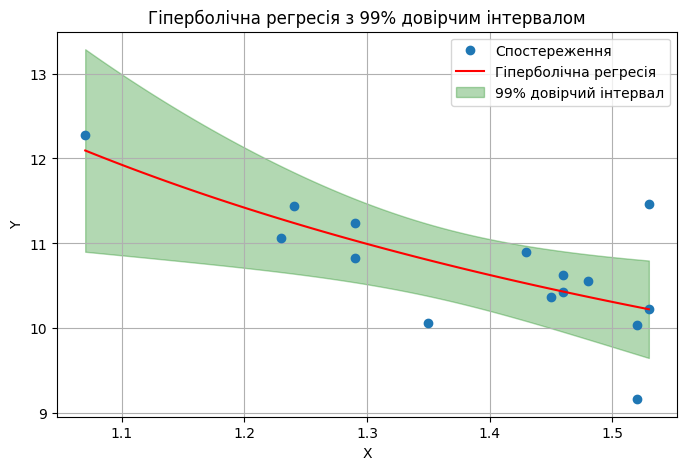

In [22]:
x_vals = np.linspace(min(df2["X"]), max(df2["X"]), 100)
y_vals = model2.params["const"] + model2.params["1/X"] * (1 / x_vals)
pred_ci = model2.get_prediction(sm.add_constant(1 / x_vals)).conf_int(alpha=0.01)

plt.figure(figsize=(8, 5))
plt.plot(df2["X"], df2["Y"], 'o', label="Спостереження")
plt.plot(x_vals, y_vals, 'r-', label="Гіперболічна регресія")
plt.fill_between(x_vals, pred_ci[:, 0], pred_ci[:, 1], color='green', alpha=0.3, label="99% довірчий інтервал")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Гіперболічна регресія з 99% довірчим інтервалом")
plt.legend()
plt.grid(True)